### 1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness
Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

### 1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и
средней годовой смертностью?
a. Построить точечный график
b. Рассчитать коэффициенты корреляции Пирсона и Спирмена
c. Построить модель линейной регрессии
d. Рассчитать коэффициент детерминации
e. Вывести график остатков
2. Сохраняется ли аналогичная зависимость для северных и южных городов
по отдельности?
a. Разделить данные на 2 группы
b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [6]:
data = pd.read_csv('D:/DATA_SCIENCE/dataset/18_dz_corr_regr/water.csv')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:title={'center':'Зависимость смертности от концентрации Ca+ в воде (жёсткости) для 61 города в Англии и Уэльсе'}, xlabel='hardness', ylabel='mortality'>

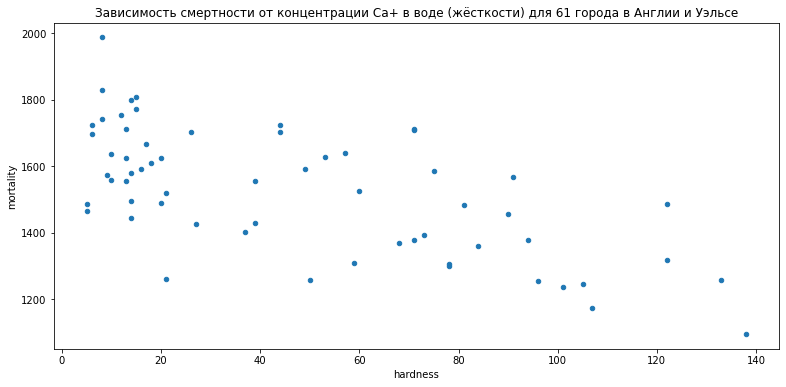

In [18]:
data.plot.scatter(x='hardness', y='mortality', title = 'Зависимость смертности от концентрации Ca+ в воде (жёсткости) для 61 города в Англии и Уэльсе')

#### На графике прослеживается отрицательная линейная зависимость

In [14]:
# коэффициент Пирсона
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [16]:
# коэффициент Спирмена
data[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [17]:
# коэффициент Кенделла
data[['hardness', 'mortality']].corr(method = 'kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


#### Значений коэффициентов Пирсона и Спирмена (в меньшей степени Кенделла) указывают на высокую обратную корреляцию значений жесткости и смертности.

In [20]:
# Построение модели линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data[['hardness']]
y = data['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape

(42, 1)

In [21]:
y_train.shape

(42,)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [25]:
model.coef_

array([-3.13167087])

In [26]:
model.intercept_

1668.9722977277095

#### Увеличение на единицу жёсткости воды уменьшает уменьшает смертность в 3.13 раза и прибавляет на 1668.9 тыс. чел. на 100 тыс. чел.

In [28]:
# Строим прогнозную модель
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [29]:
# метод возвращает значение коэффициента детерминации
model.score(X_test, y_test) 

0.5046490611017092

#### Коэффициент детерминации показывает, что модель на 50 % описывает зависимость смертности от жёсткости

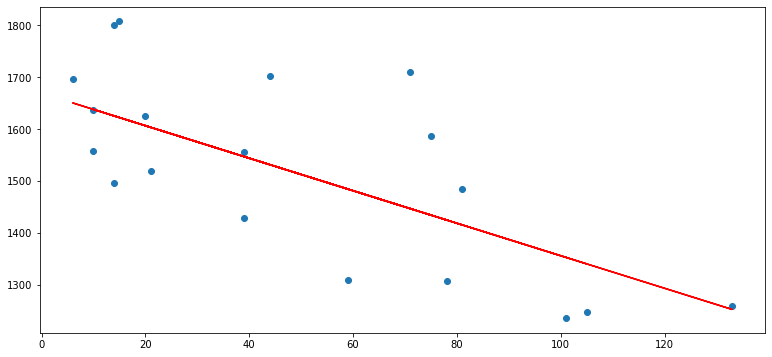

In [53]:
# Выводим график остатков
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

#### Остатки распределены хаотично

In [59]:
# Альтернативный способ из statsmodel
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу
X_const.shape

(42, 2)

In [60]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [61]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           7.83e-06
Time:                        14:57:34   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [62]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912279


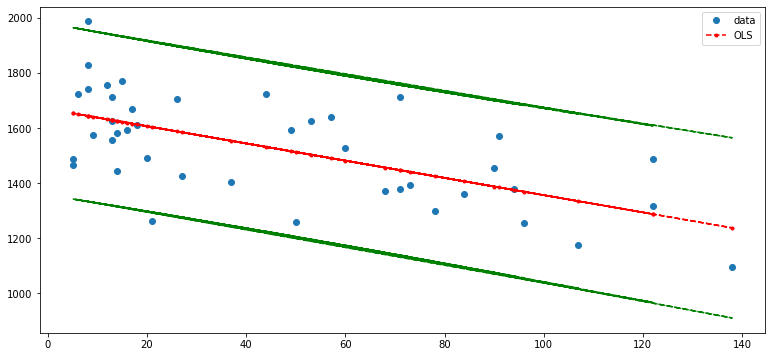

In [67]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

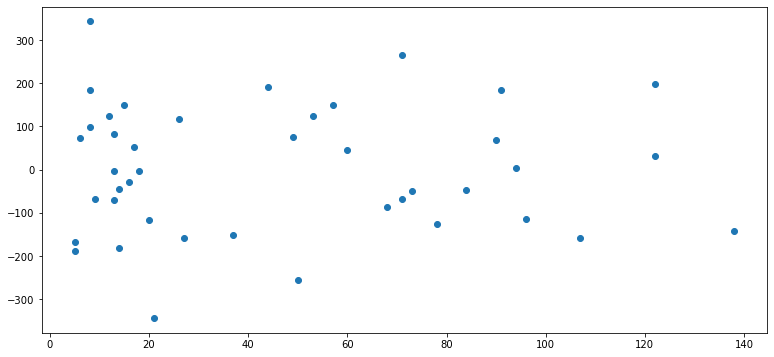

In [68]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <BarContainer object of 10 artists>)

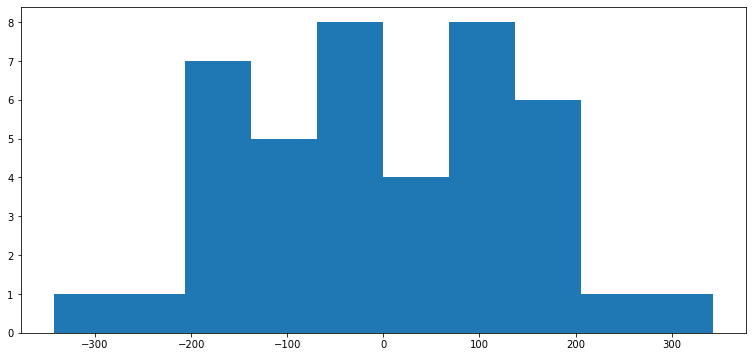

In [69]:
plt.hist(results.resid)

Остатки распределены случайно, имеют нормальное распределение.
Коэффициент детерминациии = 0,397. Данный метод хуже оценивает модель. Вероятно данные требуют дополнительной обработки.

### Анализ зависимостей для северных и южных городов по отдельности

In [74]:
north_data = data.loc[data.location == 'North']
north_data.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


In [75]:
south_data = data.loc[data.location == 'South']
south_data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:title={'center':'Зависимость смертности от концентрации Ca+ в воде (жёсткости) для городов Юга Англии и Уэльса'}, xlabel='hardness', ylabel='mortality'>

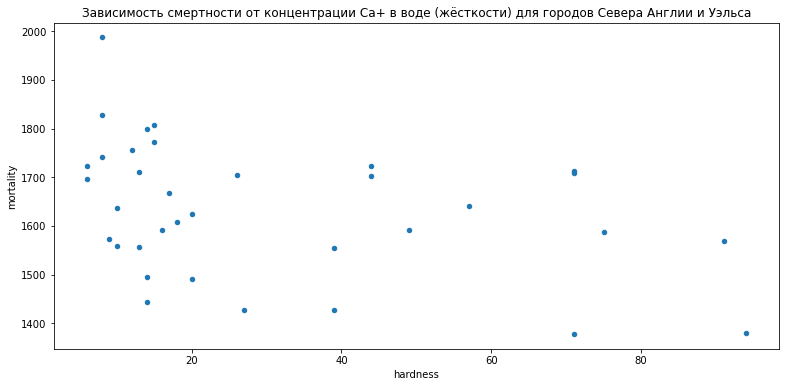

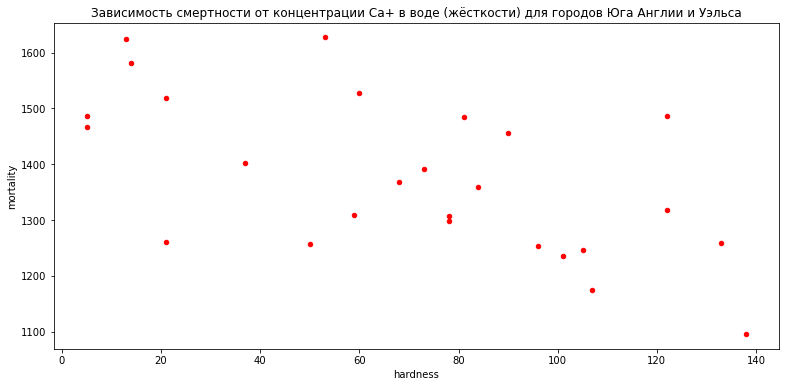

In [81]:
north_data.plot.scatter(x='hardness', y='mortality', title = 'Зависимость смертности от концентрации Ca+ в воде (жёсткости) для городов Севера Англии и Уэльса')
south_data.plot.scatter(x='hardness', y='mortality', c = 'r', title = 'Зависимость смертности от концентрации Ca+ в воде (жёсткости) для городов Юга Англии и Уэльса')

(<seaborn.axisgrid.PairGrid at 0x1aa4f6fe760>,
 <seaborn.axisgrid.PairGrid at 0x1aa52550970>)

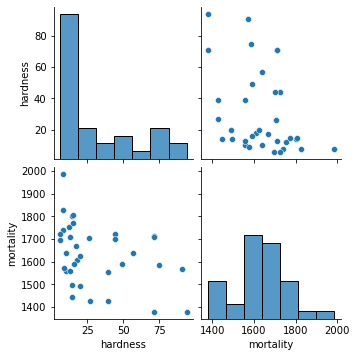

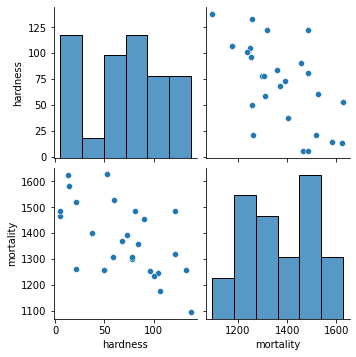

In [85]:
sns.pairplot(north_data[['hardness','mortality']]), sns.pairplot(south_data[['hardness','mortality']])

#### На обоих графиках прослеживается отрицательная линейная зависимость

In [110]:
# коэффициент корреляции Пирсона для Севера и Юга

print('{:^30}'.format('Север'))
print(north_data[['hardness','mortality']].corr())
print('{:^30}'.format('Юг'))
print(south_data[['hardness','mortality']].corr())

            Север             
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
              Юг              
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000


In [111]:
# коэффициент корреляции Спирмена для Севера и Юга

print('{:^30}'.format('Север'))
print(north_data[['hardness','mortality']].corr(method = 'spearman'))
print('{:^30}'.format('Юг'))
print(south_data[['hardness','mortality']].corr(method = 'spearman'))

            Север             
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000
              Юг              
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


In [112]:
# коэффициент корреляции Кендалла для Севера и Юга
print('{:^30}'.format('Север'))
print(north_data[['hardness','mortality']].corr(method = 'kendall'))
print('{:^30}'.format('Юг'))
print(south_data[['hardness','mortality']].corr(method = 'kendall'))

            Север             
           hardness  mortality
hardness   1.000000  -0.283058
mortality -0.283058   1.000000
              Юг              
           hardness  mortality
hardness   1.000000  -0.440315
mortality -0.440315   1.000000


#### Наблюдается более сильная обратная корреляция между жёсткостью воды и смертностью для городов Юга

In [113]:
# Построение моделей линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_north = north_data[['hardness']]
y_north = north_data['mortality']
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_north, y_north, test_size=0.30, random_state=42)

X_south = south_data[['hardness']]
y_south = south_data['mortality']
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, test_size=0.30, random_state=42)


In [114]:
print(X_north_train.shape, y_north_train.shape)
print(X_south_train.shape, y_south_train.shape)

(24, 1) (24,)
(18, 1) (18,)


In [115]:
model_north = LinearRegression()
model_south = LinearRegression()
model_north.fit(X_north_train, y_north_train)
model_south.fit(X_south_train, y_south_train)

LinearRegression()

In [123]:
print(f'Север - {model_north.coef_}, Юг - {model_south.coef_}')

Север - [-1.97686226], Юг - [-3.51342921]


In [124]:
print(f'Север - {model_north.intercept_}, Юг - {model_south.intercept_}')

Север - 1688.150229031281, Юг - 1640.2204603423374


#### Увеличение на единицу жёсткости воды уменьшает смертность в 3.51 раза для Юга и в 1,97 раза для Севера.
#### При этом влияние остальных факторов на увеличение смертности для Юга и Севера примерно в одном диапазоне.
#### Можно предположить, что на снижение смертности жителей Юга в большей степени влияет увеличение жёсткости воды, чем для жителей Севера. 

In [129]:
# Строим прогнозные модели
y_north_pred = model_north.predict(X_north_test)
y_south_pred = model_south.predict(X_south_test)
y_north_pred, y_south_pred

(array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
        1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
        1611.05260089, 1658.49729513, 1611.05260089]),
 array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
        1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428]))

In [131]:
# Значение коэффициента детерминации
print(f'Север - {model_north.score(X_north_test, y_north_test)}, Юг - {model_south.score(X_south_test, y_south_test)}')

Север - 0.018885304285745863, Юг - -2.5519223012352077


In [132]:
print(f'Север - {model_north.score(X_north_train, y_north_train)}, Юг - {model_south.score(X_south_train, y_south_train)}')

Север - 0.19322282610033525, Юг - 0.6363808308877192


#### Значения коэффициента детерминации при проверке на тестовых данных показывает или недостаток наших моделей или некорректность и недостаточность данных, попавших в тестовую выборку, и требует переобучения и перепроверки модели.
#### На тестовых данных модель для Юга показывает сильную зависимость показателей жесткости и смертности и слабую для Севера.

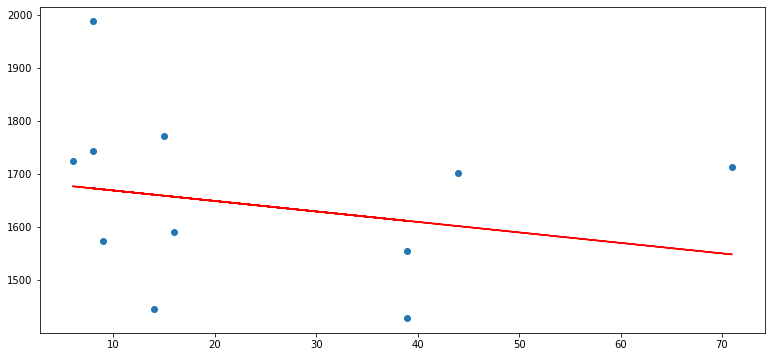

In [147]:
plt.scatter(X_north_test, y_north_test)
plt.plot(X_north_test, y_north_pred, c='r')

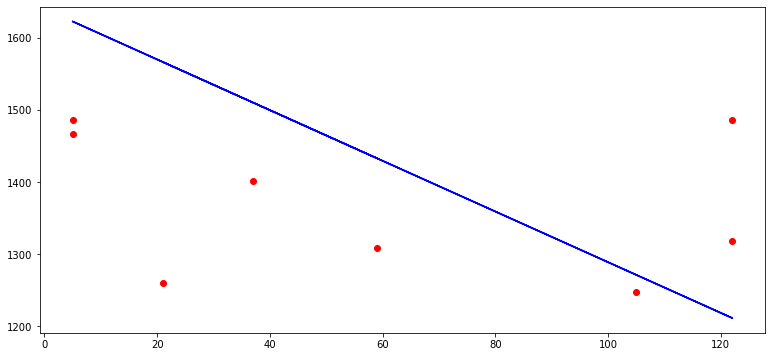

In [143]:
plt.scatter(X_south_test, y_south_test, c = 'r')
plt.plot(X_south_test, y_south_pred, c='b')

In [159]:
# Альтернативный способ из statsmodel
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_north, y_north, test_size=0.20, random_state=42)
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, test_size=0.20, random_state=42)
X_north_const = sm.add_constant(X_north_train)
X_south_const = sm.add_constant(X_south_train)
X_north_const.shape, X_south_const.shape

((28, 2), (20, 2))

In [161]:
model_north = sm.OLS(y_north_train, X_north_const)
results_north = model_north.fit()
print('СЕВЕР')
print(results_north.summary())

СЕВЕР
                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     7.228
Date:                Wed, 06 Jan 2021   Prob (F-statistic):             0.0124
Time:                        18:56:18   Log-Likelihood:                -171.85
No. Observations:                  28   AIC:                             347.7
Df Residuals:                      26   BIC:                             350.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1694.9053     34.641     48.927   

In [162]:
model_south = sm.OLS(y_south_train, X_south_const)
results_south = model_south.fit()
print('ЮГ')
print(results_south.summary())

ЮГ
                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     24.41
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           0.000106
Time:                        18:56:33   Log-Likelihood:                -119.64
No. Observations:                  20   AIC:                             243.3
Df Residuals:                      18   BIC:                             245.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1595.4338     49.134     32.471      

In [164]:
print('СЕВЕР')
print('Parameters: ', results_north.params)
print('R2: ', results_north.rsquared)

СЕВЕР
Parameters:  const       1694.905301
hardness      -2.250389
dtype: float64
R2:  0.21753235135479732


In [165]:
print('ЮГ')
print('Parameters: ', results_south.params)
print('R2: ', results_south.rsquared)

ЮГ
Parameters:  const       1595.433755
hardness      -3.074661
dtype: float64
R2:  0.5755495589538906


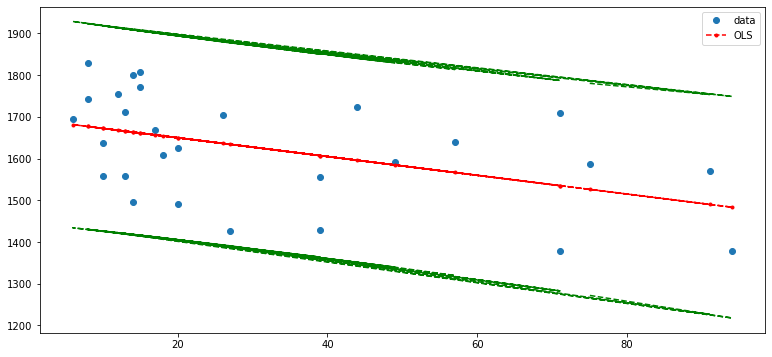

In [166]:
prstd, iv_l, iv_u = wls_prediction_std(results_north) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(X_north_const.iloc[:, 1], y_north_train, 'o', label="data")
ax.plot(X_north_const.iloc[:, 1], results_north.fittedvalues, 'r--.', label="OLS")
ax.plot(X_north_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_north_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

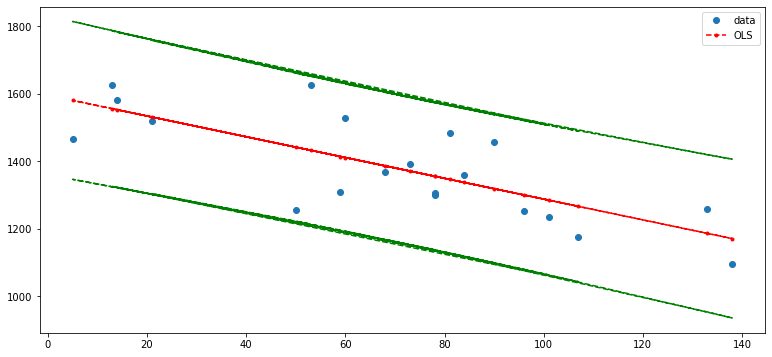

In [167]:
prstd, iv_l, iv_u = wls_prediction_std(results_south) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(X_south_const.iloc[:, 1], y_south_train, 'o', label="data")
ax.plot(X_south_const.iloc[:, 1], results_south.fittedvalues, 'r--.', label="OLS")
ax.plot(X_south_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_south_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

#### Для построения модели по биб-ке statsmodel пришлось уменьшить кол-во до 20 % тестовых данных, что подтверждает гипотезу об их недостаточности.
#### Для городов Юга сохраняется общая тенденция обратной зависимости смертности от жесткости, для городов Севера такая тенденция менее выражена (вероятно на причины смертности в большей степени влияют иные факторы).
